## Nearest Neighbor Classifier for CIFAR-10

In [10]:
-- load test images
te_x = torch.load('cifar10/te_data.bin')
-- load test labels 
te_y = torch.load('cifar10/te_labels.bin')

-- assuming the traning set to be the same 
-- as the test set
tr_x = te_x
tr_y = te_y

In [11]:
print(te_x:size())
print(te_y:size())

 10000
     3
    32
    32
[torch.LongStorage of size 4]

 10000
[torch.LongStorage of size 1]



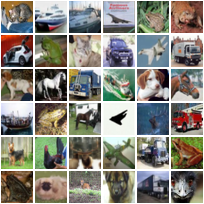

 3
 8
 8
 0
 6
 6
 1
 6
 3
 1
 0
 9
 5
 7
 9
 8
 5
 7
 8
 6
 7
 0
 4
 9
 5
 2
 4
 0
 9
 6
 6
 5
 4
 5
 9
 2
[torch.ByteTensor of size 36]



In [12]:
-- display the first 36 training set images
require 'image';
itorch.image(te_x[{{1,36},{},{},{}}])
print(te_y[{{1,36}}])

In [13]:
local NN = torch.class("NN")

function NN:__init()
end

function NN:train(X, y)
  -- X is 2D of size N x D = 32x32x3, so each row is an example
  -- Y is 1D of size N 
  self.tr_x = X
  self.tr_y = y
end

function NN:predict(x)
  -- x is of size D = 32x32x3 for which we want to predict the label
  -- returns the predicted label for the input x
  local min_idx = nil
  local min_dist = 1e10
  for i=1, self.tr_x:size(1) do
    local dist = (self.tr_x[i] - x):float():abs():sum()
    if (dist < min_dist) then
      min_dist = dist
      min_idx = i
    end
  end
  return self.tr_y[min_idx]
end

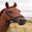

7	


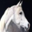

7	


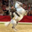

7	


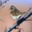

2	


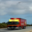

9	


In [14]:
classifier = NN.new()
classifier:train(tr_x, tr_y)

itorch.image(te_x[100])
print (classifier:predict(te_x[100]))

itorch.image(te_x[110])
print (classifier:predict(te_x[110]))

itorch.image(te_x[120])
print (classifier:predict(te_x[120]))

itorch.image(te_x[130])
print (classifier:predict(te_x[130]))

itorch.image(te_x[140])
print (classifier:predict(te_x[140]))

In [15]:
require 'math'
function evaluate()
    errors = 0
    for i = 1,10 do
        xi = tr_x[i] 
        ti = tr_y[i] 
        op = classifier:predict(xi)
        if ti ~= op then
            errors = errors + 1
        end
    end
    return errors
end

In [16]:
print(evaluate())

0	
